# Introdução

Nesse notebook serão feitas algumas práticas envolvendo os estudos de deep learning. Aqui não serão encontradas explicações sobre tudo que significa essa área de estudos, mas apenas como utilizar esse conhecimento em algumas aplicações.

Aqui será implementado conceitos de redes neurais com uso de deep learning para prever valores de conversões de unidades, no caso a mudança de unidades de Celsius para Fahrenheit sem utilizar a formula básica de conversões, partindo de uma tarefa de regressão baseada em sua base de dados. 

Os dados de entrada e saída são:

*   Input (X): Temperatura
*   Output (Y): Lucro diário em dólares




# Import de bibliotecas utilizadas e dataset

In [27]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importanto dataset

In [28]:
temperature_df = pd.read_csv('/content/gdrive/My Drive/Notebooks_de_estudo/Estudos_data_science_e_machine_learning/Práticas de deep learning/Projeto 01 - Conversão de unidades/Celius-to-fereheint.csv')


In [29]:
#garantindo que os index estejam devidamente sequenciais e eliminando dados sem index
temperature_df.reset_index(drop = True, inplace = True)


In [30]:
#se aplicarmos a formula básica poderemos conferir que as temepraturas conferem em suas conversões 
temperature_df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [31]:
temperature_df.tail()

,Celsius,Fahrenheit
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [32]:
#Podemos conferir que nao existem dados faltantes e os tipos de dados
temperature_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [33]:
temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


## Visualizando os dados

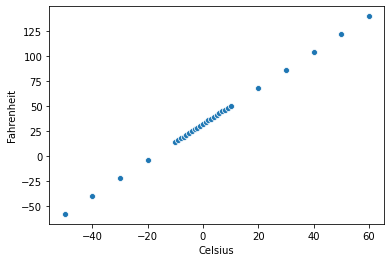

In [34]:
sns.scatterplot(temperature_df['Celsius'], temperature_df['Fahrenheit'])

# Configurando a base de dados de treinamento

Como primeiro ponto, os dados serão separados em dados de entrada para treinamento e dados alvos como saída, no caso a conversão de Celsius para Fahrenheit, Celsius como entrada e respectivamente Fahrenheit como saída posição a posição de resgistro. 

In [35]:
x_train = temperature_df['Celsius']
y_train = temperature_df['Fahrenheit']

In [36]:
#conferindo a associação
x_train

0    -50
1    -40
2    -30
3    -20
4    -10
5     -9
6     -8
7     -7
8     -6
9     -5
10    -4
11    -3
12    -2
13    -1
14     0
15     1
16     2
17     3
18     4
19     5
20     6
21     7
22     8
23     9
24    10
25    20
26    30
27    40
28    50
29    60
Name: Celsius, dtype: int64

In [37]:
y_train

0     -58.0
1     -40.0
2     -22.0
3      -4.0
4      14.0
5      15.8
6      17.6
7      19.4
8      21.2
9      23.0
10     24.8
11     26.6
12     28.4
13     30.2
14     32.0
15     33.8
16     35.6
17     37.4
18     39.2
19     41.0
20     42.8
21     44.6
22     46.4
23     48.2
24     50.0
25     68.0
26     86.0
27    104.0
28    122.0
29    140.0
Name: Fahrenheit, dtype: float64

In [38]:
print(x_train.shape)
print(y_train.shape)

(30,)
(30,)


## Construção do modelo e treinamento

Nesta etapa será feito o treinamento (ajuste) dos pesos dos neurônios, utilizando como base o encontro dos valores de entrada com o valores de saída. Então primeiro se cria o modelo e depois associa os dados de entrada de treino com os dados de saída. 

In [39]:
#criando o modelo e associando os neurônios na camada um a um
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [40]:
#complinado o modelo baseado nos parâmetros a seguir
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [47]:
epochs_hist = model.fit(x_train, y_train, epochs = 1000) #Ncessário rodar algumas vezes seguidas para um bom resultado

Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - loss: 4.8851e-04
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.7672e-04
Epoch 3/1000
1/1 [==============================] - 0s 1ms/step - loss: 4.6527e-04
Epoch 4/1000
1/1 [==============================] - 0s 1ms/step - loss: 4.5405e-04
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.4308e-04
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.3244e-04
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.2198e-04
Epoch 8/1000
1/1 [==============================] - 0s 1ms/step - loss: 4.1183e-04
Epoch 9/1000
1/1 [==============================] - 0s 1ms/step - loss: 4.0187e-04
Epoch 10/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.9211e-04
Epoch 11/1000
1/1 [==============================] - 0s 1ms/step - loss: 3.8260e-04
Epoch 12/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.7330e-04
E

De base do modelo treinado, podemos avaliar como esta o comportamento da rede e seus resultados encontrados comparando com a saída original.

#Comparando os resultados

In [48]:
epochs_hist.history.keys()

dict_keys(['loss'])

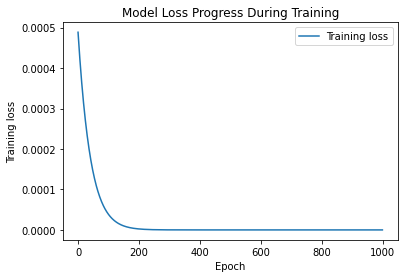

In [49]:
#plotando a evolução dos erros ao longo do treinamento e por épocas
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss']);

In [50]:
#conferindo os pesos
model.get_weights()

[array([[1.8000002]], dtype=float32), array([31.999954], dtype=float32)]

Conferindo resultado estimado pela rede neural com o resultado gerado pela formula

In [51]:
#Entrada
temp_c = 10
#Estimando resultado com base na rede treinada
temp_f = model.predict([temp_c])
temp_f

array([[49.999954]], dtype=float32)

In [52]:
#Resultado com base na formula 
temp_f1 = 9/5 * temp_c + 32
temp_f1

50.0